In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install  mlforecast
from mlforecast.utils import generate_daily_series
!pip install pyarrow
!pip install statsforecast
from statsforecast import StatsForecast
#importing for visualization process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
#import fbprophet
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/opt/conda/lib/python3.7/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


![forecast](https://thumbs.dreamstime.com/z/man-holding-documents-demand-forecasting-name-108646291.jpg)

In [4]:
#reading ing_w data
ing_w=pd.read_csv('/kaggle/input/ing-w-data/ing_w.csv')

In [3]:
ing_w

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,690.45510,25.0,0.0,20.0,1019.5,0.0,73.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
1,2016-01-01 00:00:00,fid_90053,ing_w,252.69617,25.0,0.0,20.0,1019.5,0.0,73.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
2,2016-01-01 00:00:00,fid_17537,ing_w,499.44653,25.0,0.0,20.0,1019.5,0.0,73.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
3,2016-01-01 00:00:00,fid_110392,ing_w,2200.40750,25.0,0.0,20.0,1019.5,0.0,73.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
4,2016-01-01 00:00:00,fid_62402,ing_w,10833.14000,25.0,0.0,20.0,1019.5,0.0,73.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269890,2016-04-28 12:00:00,fid_74945,ing_w,7561.37500,0.5,340.0,-7.1,1021.0,3.6,59.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,126.000
12269891,2016-12-17 06:00:00,fid_112848,ing_w,6320.19100,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.094
12269892,2016-12-17 06:00:00,fid_58769,ing_w,8659.11700,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,193.000
12269893,2016-12-17 06:00:00,fid_117010,ing_w,11857.39550,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,289.500


In [5]:
#converting date to datetime format for predictions
ing_w['date'] = pd.to_datetime(ing_w['date'])

In [6]:
#setting index according to the date and sorting the index
ing_w = ing_w.set_index(ing_w['date'])
ing_w = ing_w.sort_index()

In [7]:
# create train test partition
train = ing_w['2016-01-01 00:00:00':'2016-11-30 00:00:00']
test  = ing_w['2016-12-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (11195755, 43)
Test Dataset: (1041243, 43)


In [7]:
train

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,fid_110884,ing_w,690.45510,25.0,0.0,20.0,1019.5,0.0,73.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000
2016-01-01,2016-01-01,fid_78150,ing_w,5245.95360,3.8,240.0,2.4,1021.0,3.1,93.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.4553
2016-01-01,2016-01-01,fid_23619,ing_w,5948.02150,3.8,240.0,2.4,1021.0,3.1,93.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.2500
2016-01-01,2016-01-01,fid_35152,ing_w,10984.01500,3.8,240.0,2.4,1021.0,3.1,93.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.4380
2016-01-01,2016-01-01,fid_94133,ing_w,5261.00400,3.8,240.0,2.4,1021.0,3.1,93.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.6071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30,2016-11-30,fid_106014,ing_w,6187.34000,13.9,160.0,13.9,1011.5,3.6,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.8600
2016-11-30,2016-11-30,fid_16071,ing_w,15793.51000,13.9,160.0,13.9,1011.5,3.6,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0800
2016-11-30,2016-11-30,fid_88217,ing_w,2287.08600,13.9,160.0,13.9,1011.5,3.6,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9800


In [8]:
#resampling train data according to the hours and interpolating with linear method
train = train.resample('H').mean()
train = train.interpolate(method='linear')
#resampling test data according to the hours and interpolating with linear method
test = test.resample('H').mean()
test= test.interpolate(method='linear')

By performing these operations on the datasets, we are preparing them for further analysis, such as time series forecasting or machine learning. Resampling and interpolation can help to reduce noise and make the data more consistent, which can improve the accuracy of the analysis.

**yield_Linear_Interpolation**

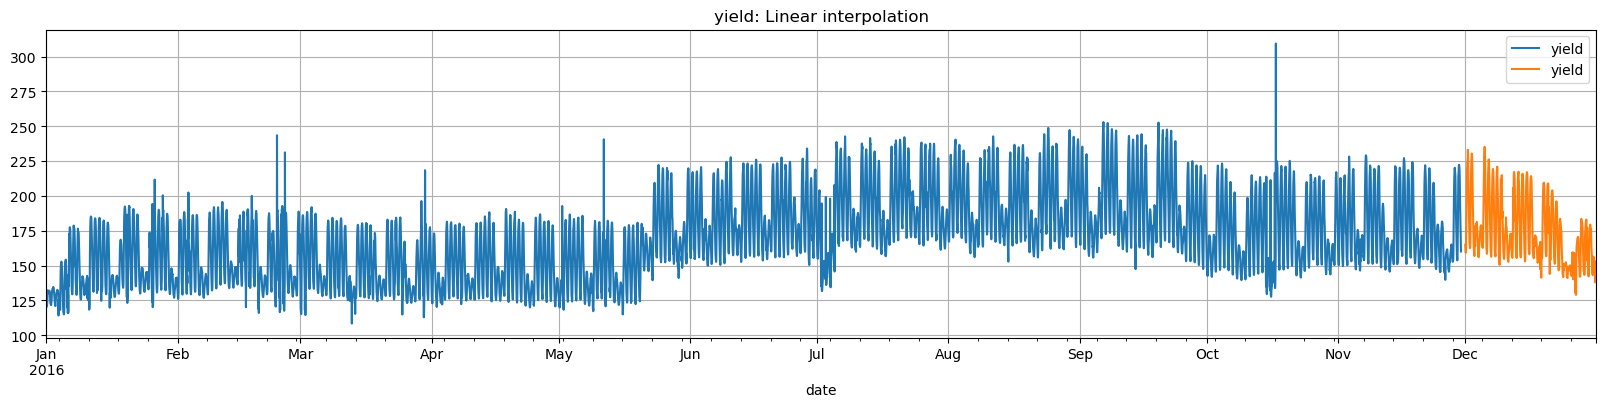

In [9]:
train = train.assign(yield_Linear_Interpolation=train['yield'].interpolate(method='linear'))
train[['yield']].plot(figsize=(20, 4))
test["yield"].plot()
plt.grid()
plt.legend(loc='best')
plt.title('yield: Linear interpolation')
plt.show(block=False)

In [10]:
#The rolling() method in Pandas is used to perform a rolling computation over a specified window size
movingaverage=train.rolling(window=12).mean()
movingstd=train.rolling(window=12).std()

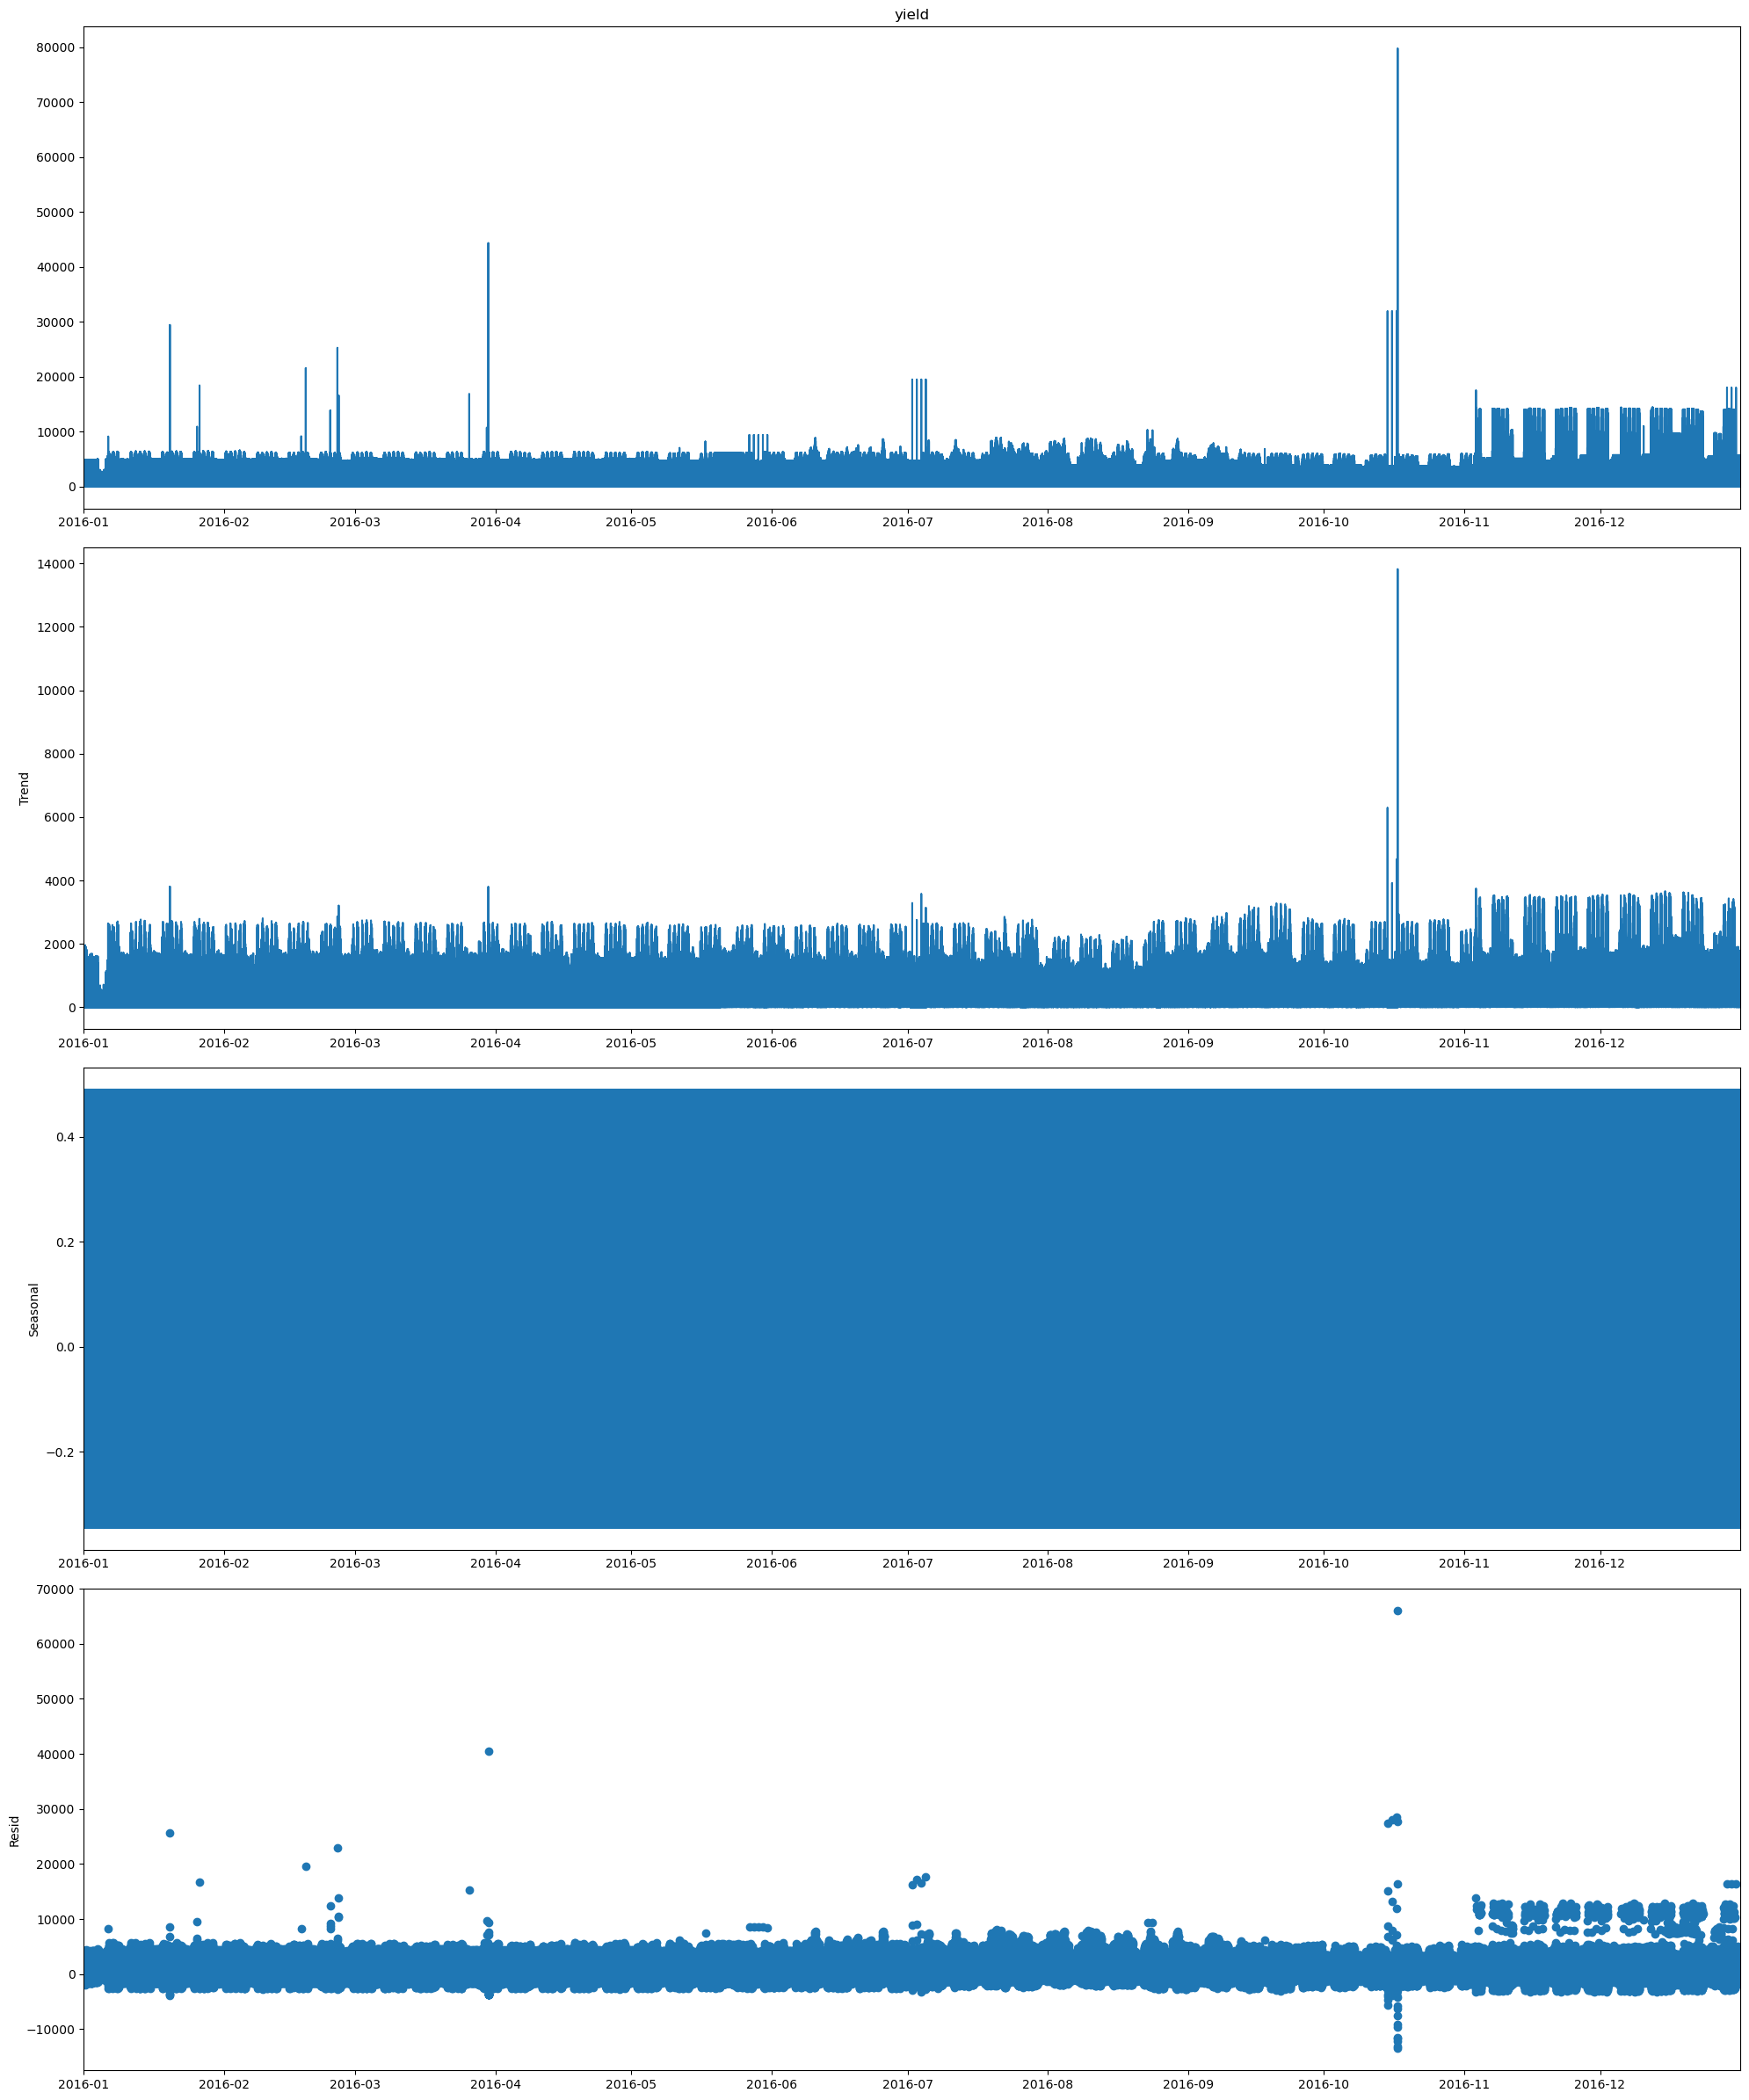

In [11]:
# plotting seasonal decompose of train data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(ing_w['yield'], model='additive',period =12) # additive seasonal index
fig = decomposition.plot()
plt.show()

Tts following a trend as we can see above and at a particular time the yield has been increased on october to november region.

**PERFORMING y_hat_avg_moving FOR TEST DATA**

Text(0.5, 1.0, 'Moving Average Forecast')

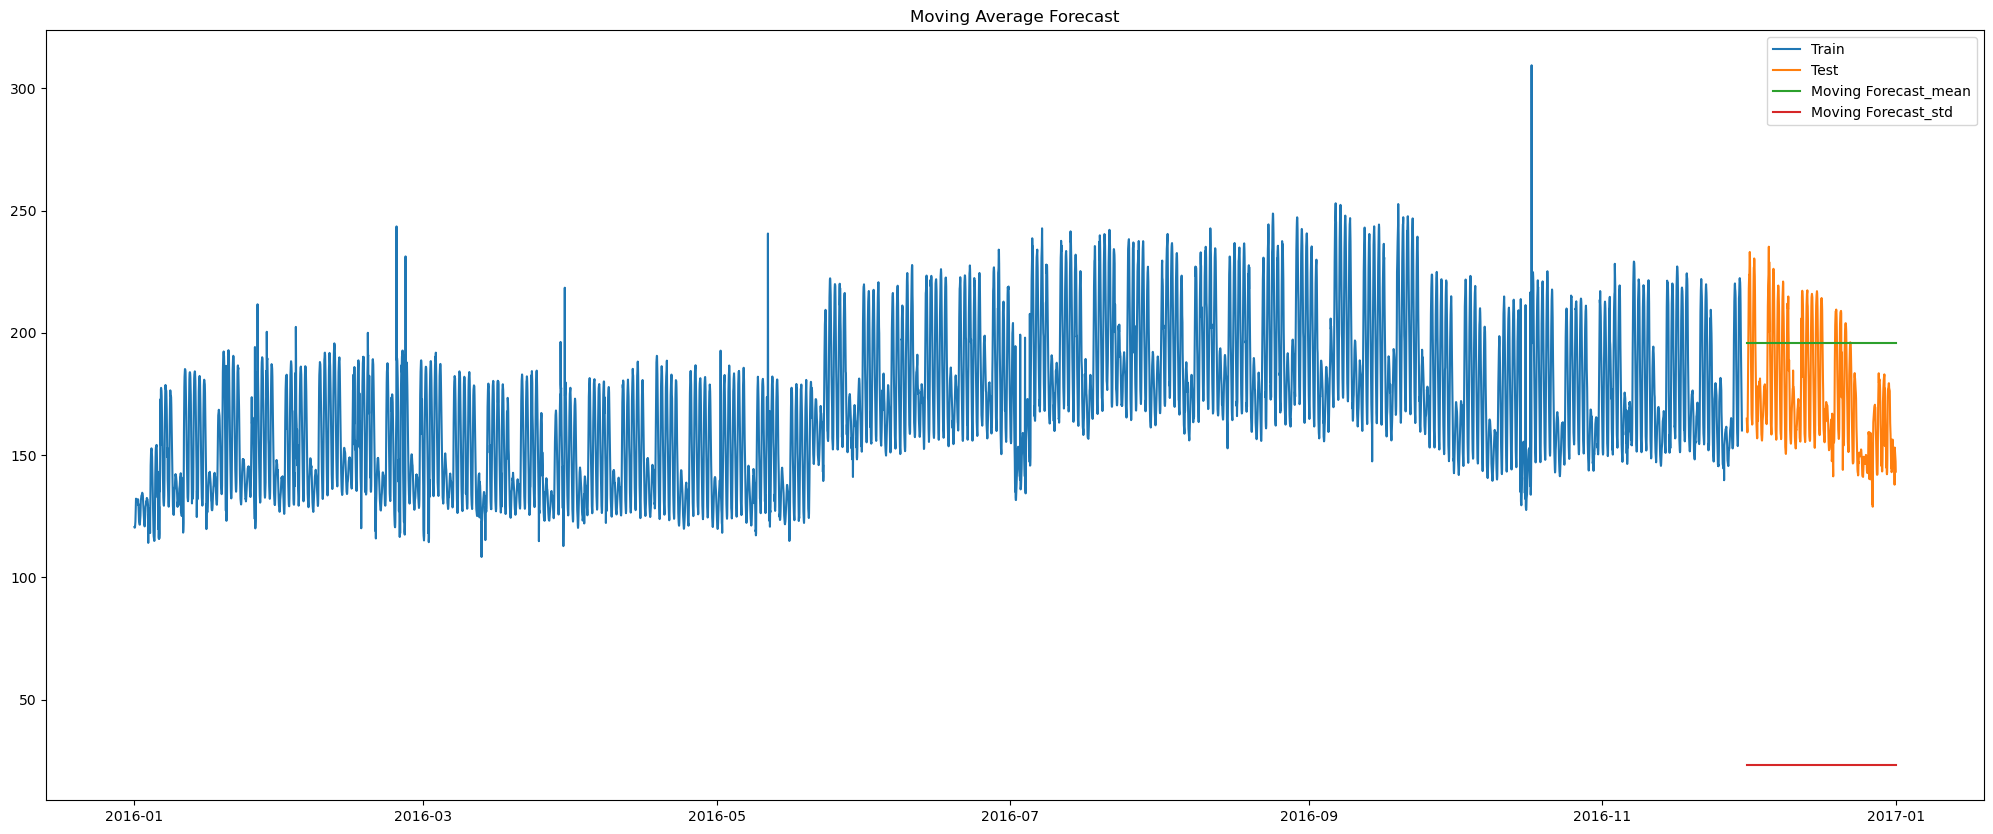

In [9]:
y_hat_avg_moving = test.copy()
y_hat_avg_moving['moving_avg_forcast_mean'] = train['yield'].rolling(window=12).mean().iloc[-1]
y_hat_avg_moving['moving_avg_forcast_std'] = train['yield'].rolling(window=12).std().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast_mean'], label='Moving Forecast_mean')
plt.plot(y_hat_avg_moving['moving_avg_forcast_std'], label='Moving Forecast_std')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [13]:
y_hat_avg_moving

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,farming_company_Del Monte Foods,farming_company_Dole Food Company,farming_company_Foster Farms,...,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield,moving_avg_forcast_mean,moving_avg_forcast_std
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,8805.625744,11.547175,216.463683,5.870800,1011.085106,3.299853,75.599699,0.095378,0.108584,0.016141,...,0.069699,0.068232,0.027146,0.077036,0.090242,0.003668,0.037417,164.901016,195.646437,23.241288
2016-12-01 01:00:00,8805.625744,10.859574,220.315481,5.629347,1010.641966,3.158988,75.320073,0.095378,0.108584,0.016141,...,0.069699,0.068232,0.027146,0.077036,0.090242,0.003668,0.037417,162.367273,195.646437,23.241288
2016-12-01 02:00:00,8798.035869,10.190455,134.515419,5.619677,1010.300661,3.076358,77.045778,0.095448,0.108664,0.016153,...,0.069016,0.068282,0.027166,0.077093,0.090308,0.003671,0.037445,160.831556,195.646437,23.241288
2016-12-01 03:00:00,8805.625744,9.742553,143.330888,6.557667,1009.971387,2.982465,84.409039,0.095378,0.108584,0.016141,...,0.069699,0.068232,0.027146,0.077036,0.090242,0.003668,0.037417,159.318220,195.646437,23.241288
2016-12-01 04:00:00,8805.625744,9.630301,154.849596,6.762876,1012.429200,3.252311,83.530704,0.095378,0.108584,0.016141,...,0.069699,0.068232,0.027146,0.077036,0.090242,0.003668,0.037417,160.235235,195.646437,23.241288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,8548.813181,10.305230,188.640167,0.689121,1015.490237,5.928870,55.471297,0.110181,0.103208,0.015342,...,0.066946,0.064854,0.025802,0.073222,0.085774,0.003487,0.035565,151.570899,195.646437,23.241288
2016-12-31 20:00:00,8548.813181,10.013808,185.746165,0.560809,1014.487099,5.401395,55.627371,0.110181,0.103208,0.015342,...,0.066946,0.064854,0.025802,0.073222,0.085774,0.003487,0.035565,150.417155,195.646437,23.241288
2016-12-31 21:00:00,8541.420144,10.169644,188.674110,0.676832,1014.112003,5.151500,56.120384,0.110258,0.103280,0.015352,...,0.066294,0.064899,0.025820,0.073273,0.085834,0.003489,0.035590,148.889888,195.646437,23.241288


In [14]:
#CHECKING RMSE VALUES OF MOVING AVERAGE
rms_avg_rolling = sqrt(mean_squared_error(test['yield'],y_hat_avg_moving['moving_avg_forcast_mean']))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 31.63537168406957


**ExponentialSmoothing**

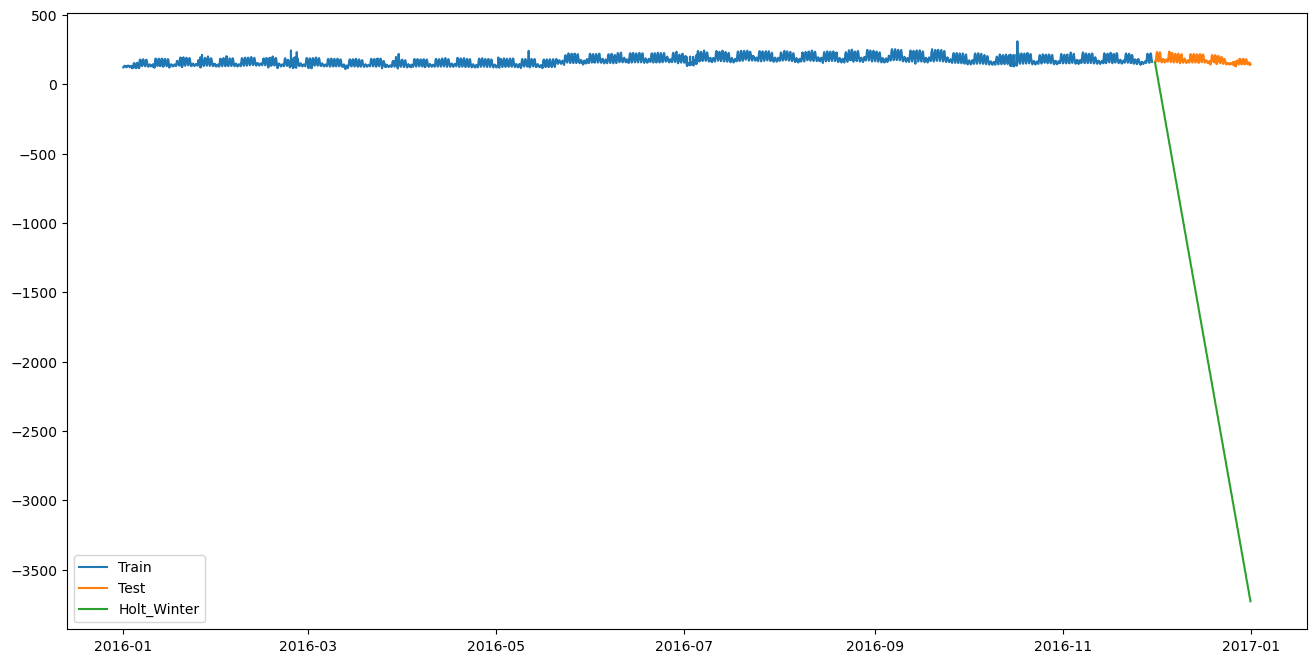

In [15]:

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['yield']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
rmse = sqrt(mean_squared_error(test['yield'], y_hat_avg.Holt_Winter))
print(rmse)

2255.7500752963465


In [17]:
 y_hat_avg.Holt_Winter

date
2016-12-01 00:00:00     154.100680
2016-12-01 01:00:00     147.024051
2016-12-01 02:00:00     140.956715
2016-12-01 03:00:00     134.587464
2016-12-01 04:00:00     128.771705
                          ...     
2016-12-31 19:00:00   -3707.291675
2016-12-31 20:00:00   -3711.472836
2016-12-31 21:00:00   -3716.787916
2016-12-31 22:00:00   -3723.297910
2016-12-31 23:00:00   -3729.096479
Freq: H, Name: Holt_Winter, Length: 744, dtype: float64

The rolling average for our model is 19.988482627808388. This prediction seems to be very consistent in hitting the average of the future sales. This naive model definitely looks like a solid model, however, it is not the best one.so we are considering moving average as a best model

**TEST DATA**

In [10]:
#reading the test data
ing_w_test= pd.read_csv('/kaggle/input/ing-w-data/ing_w_test.csv')

In [11]:
#checking the value counts of ing_w_test
ing_w_test['farm_id'].value_counts()

fid_68761     35040
fid_73431     35038
fid_68792     35038
fid_26064     35036
fid_53126     35036
              ...  
fid_42338      8246
fid_39121      8246
fid_65870      8246
fid_55346      8246
fid_117010     8246
Name: farm_id, Length: 1398, dtype: int64

In [20]:
#checking the value counts of ing_w
ing_w['farm_id'].value_counts()

fid_122174    35130
fid_73431     35130
fid_53126     35126
fid_68761     35120
fid_40459     35078
              ...  
fid_118770     2327
fid_75152      2070
fid_73322      1685
fid_20058      1012
fid_19864       479
Name: farm_id, Length: 1398, dtype: int64

as both the farm_id unique values length is same going further for forcasting

**PREPROCESSING ING_W_TEST DATA**

In [12]:
ing_w_test['date'] = pd.to_datetime(ing_w_test['date'])

In [13]:
ing_w_test = ing_w_test.set_index(ing_w_test['date'])
ing_w_test = ing_w_test.sort_index()

Text(0.5, 1.0, 'Moving Average Forecast')

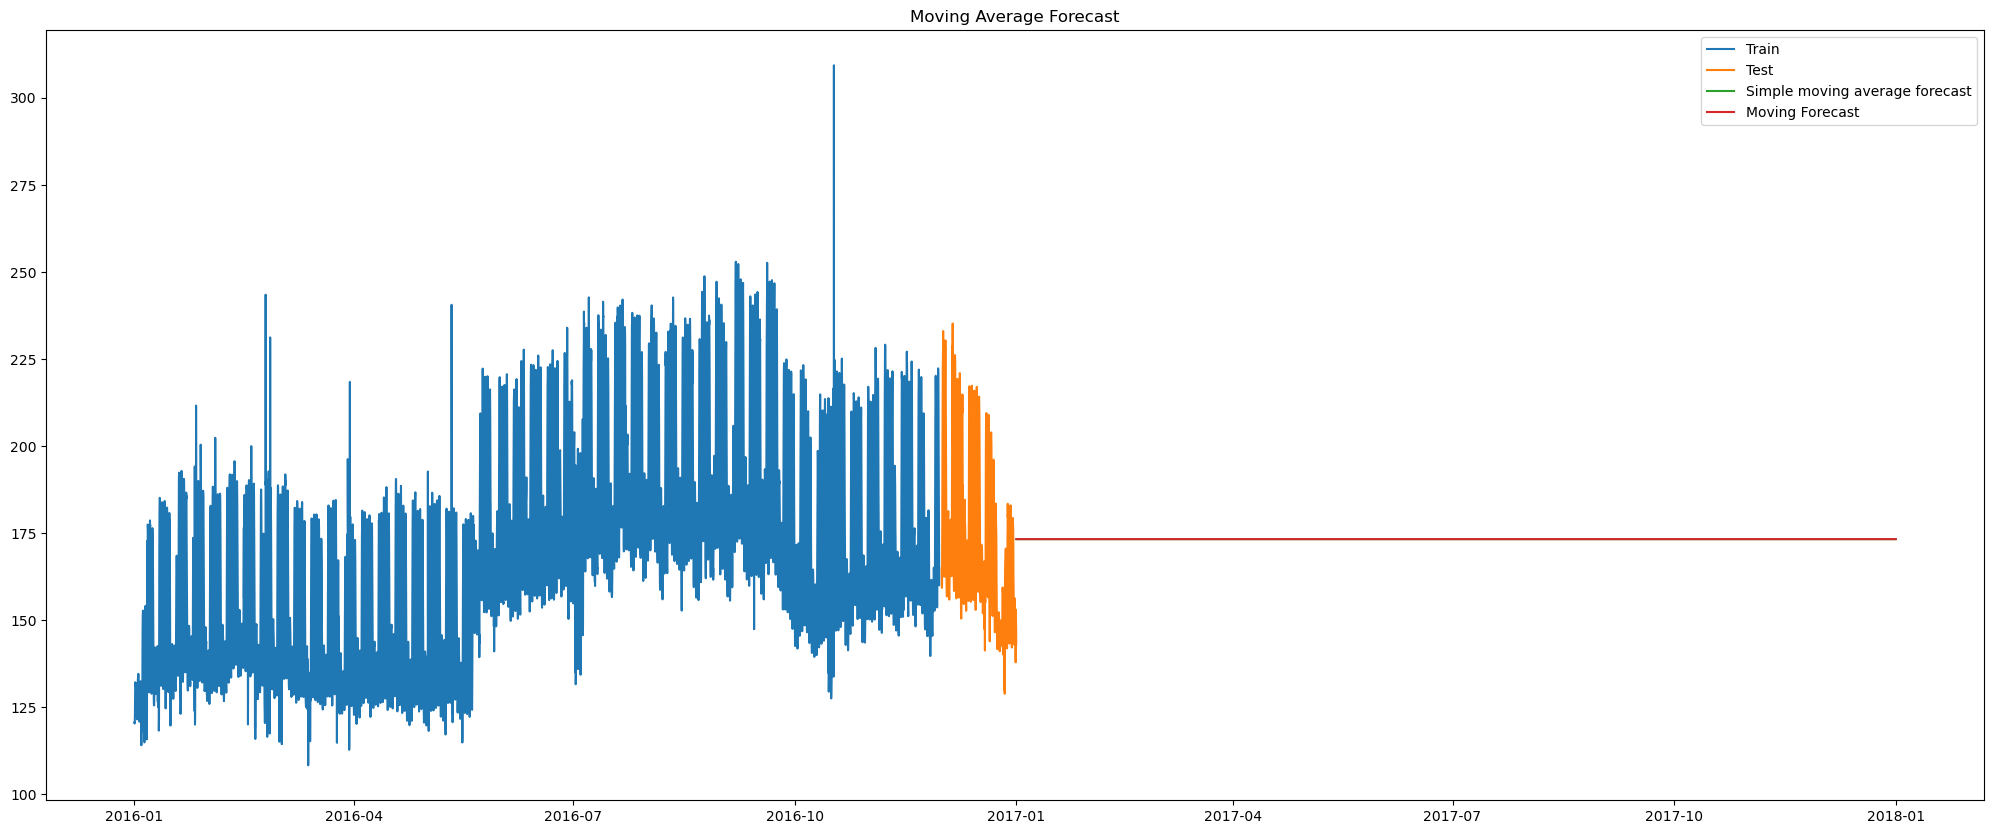

In [14]:
y_hat_avg_moving_pred = ing_w_test.copy()
y_hat_avg_moving_pred['moving_avg_forcast'] = train['yield'].rolling(200).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Simple moving average forecast')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [24]:
y_hat_avg_moving_pred

,date,farm_id,ingredient_type,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,moving_avg_forcast
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_110884,ing_w,0,690.4551,17.8,100.0,11.7,1021.5,3.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_62121,ing_w,8412510,1228.5493,8.9,190.0,-5.6,1015.5,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_23862,ing_w,8412511,1985.1512,8.9,190.0,-5.6,1015.5,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_70526,ing_w,8412512,6438.1777,8.9,190.0,-5.6,1015.5,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_88538,ing_w,8412513,7785.2715,8.9,190.0,-5.6,1015.5,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.313914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_55194,ing_w,22340246,1352.7606,0.6,360.0,-1.1,1032.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_52160,ing_w,22340247,25621.9980,0.6,360.0,-1.1,1032.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_100954,ing_w,22340250,2783.4668,0.6,360.0,-1.1,1032.0,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,173.313914


In [15]:
predictions = y_hat_avg_moving_pred[['date','farm_id', 'moving_avg_forcast']]

In [16]:
predictions

,date,farm_id,moving_avg_forcast
date,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_110884,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_62121,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_23862,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_70526,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_88538,173.313914
...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_55194,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_52160,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_100954,173.313914


In [17]:
predictions_ing_w = pd.DataFrame(predictions)

In [18]:
predictions_ing_w

,date,farm_id,moving_avg_forcast
date,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_110884,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_62121,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_23862,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_70526,173.313914
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_88538,173.313914
...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_55194,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_52160,173.313914
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_100954,173.313914


In [19]:
predictions_ing_w.to_csv('predictions_ing_w.csv', index=False)

In [26]:
# convert the data with respect to the month
predictions_ing_w['date'] = pd.to_datetime(predictions_ing_w['date'])
predictions_ing_w['month'] = predictions_ing_w['date'].dt.month
monthly_data_predictions_ing_w= predictions_ing_w.groupby('month').agg({'moving_avg_forcast': 'sum'})

# print the monthly data
print(monthly_data_predictions_ing_w)

       moving_avg_forcast
month                    
1            1.854792e+08
2            1.677308e+08
3            1.856012e+08
4            1.797295e+08
5            1.858237e+08
6            1.784761e+08
7            1.859436e+08
8            1.857192e+08
9            1.798189e+08
10           1.859414e+08
11           1.800206e+08
12           1.833644e+08


In [21]:
monthly_data_predictions_ing_w

,moving_avg_forcast
month,
1,1.854792e+08
2,1.677308e+08
3,1.856012e+08
4,1.797295e+08
5,1.858237e+08
6,1.784761e+08
7,1.859436e+08
8,1.857192e+08
9,1.798189e+08


In [22]:
# Convert the column to float
monthly_data_predictions_ing_w['moving_avg_forcast'] = monthly_data_predictions_ing_w['moving_avg_forcast'].astype(int)

In [23]:
monthly_data_predictions_ing_w.reset_index()

,month,moving_avg_forcast
0,1,185479164
1,2,167730779
2,3,185601177
3,4,179729474
4,5,185823712
5,6,178476068
6,7,185943645
7,8,185719203
8,9,179818904
9,10,185941392


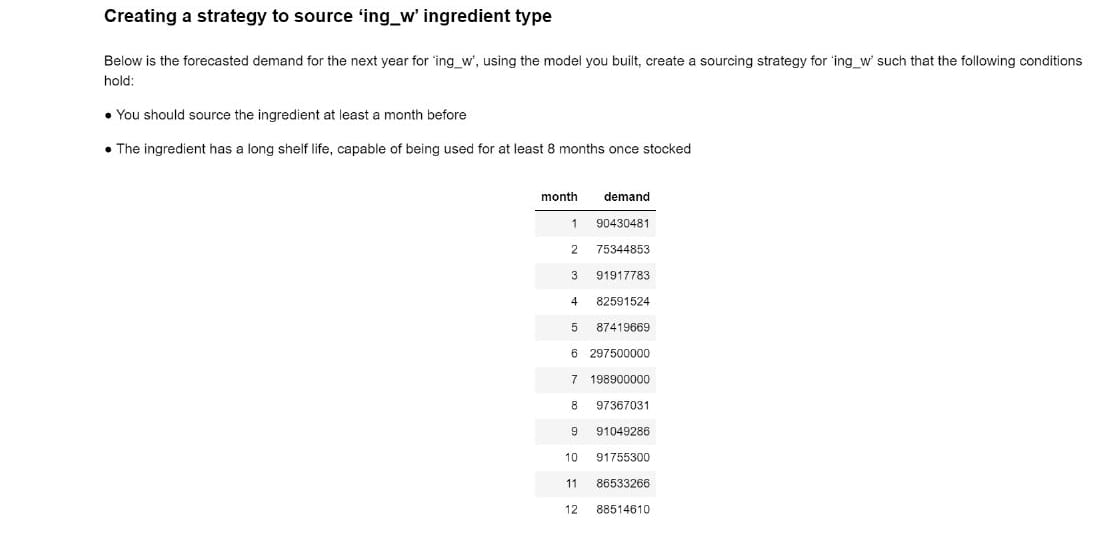

In [24]:
from IPython.display import Image
Image(filename='/kaggle/input/strategy/ING_Z_STRATEGY.jpg')

In [25]:
# create a DataFrame of the strategy for justyifying the predictions
demand = {'month': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
          'demand': ['90430481', '75344853', '91917783', '82591524', '87419669', '297500000', '198900000', '97367031', '91049286', '91755300', '86533266', '88514610']}
demand = pd.DataFrame(demand)

# print the DataFrame
print(demand)

   month     demand
0      1   90430481
1      2   75344853
2      3   91917783
3      4   82591524
4      5   87419669
5      6  297500000
6      7  198900000
7      8   97367031
8      9   91049286
9     10   91755300
10    11   86533266
11    12   88514610


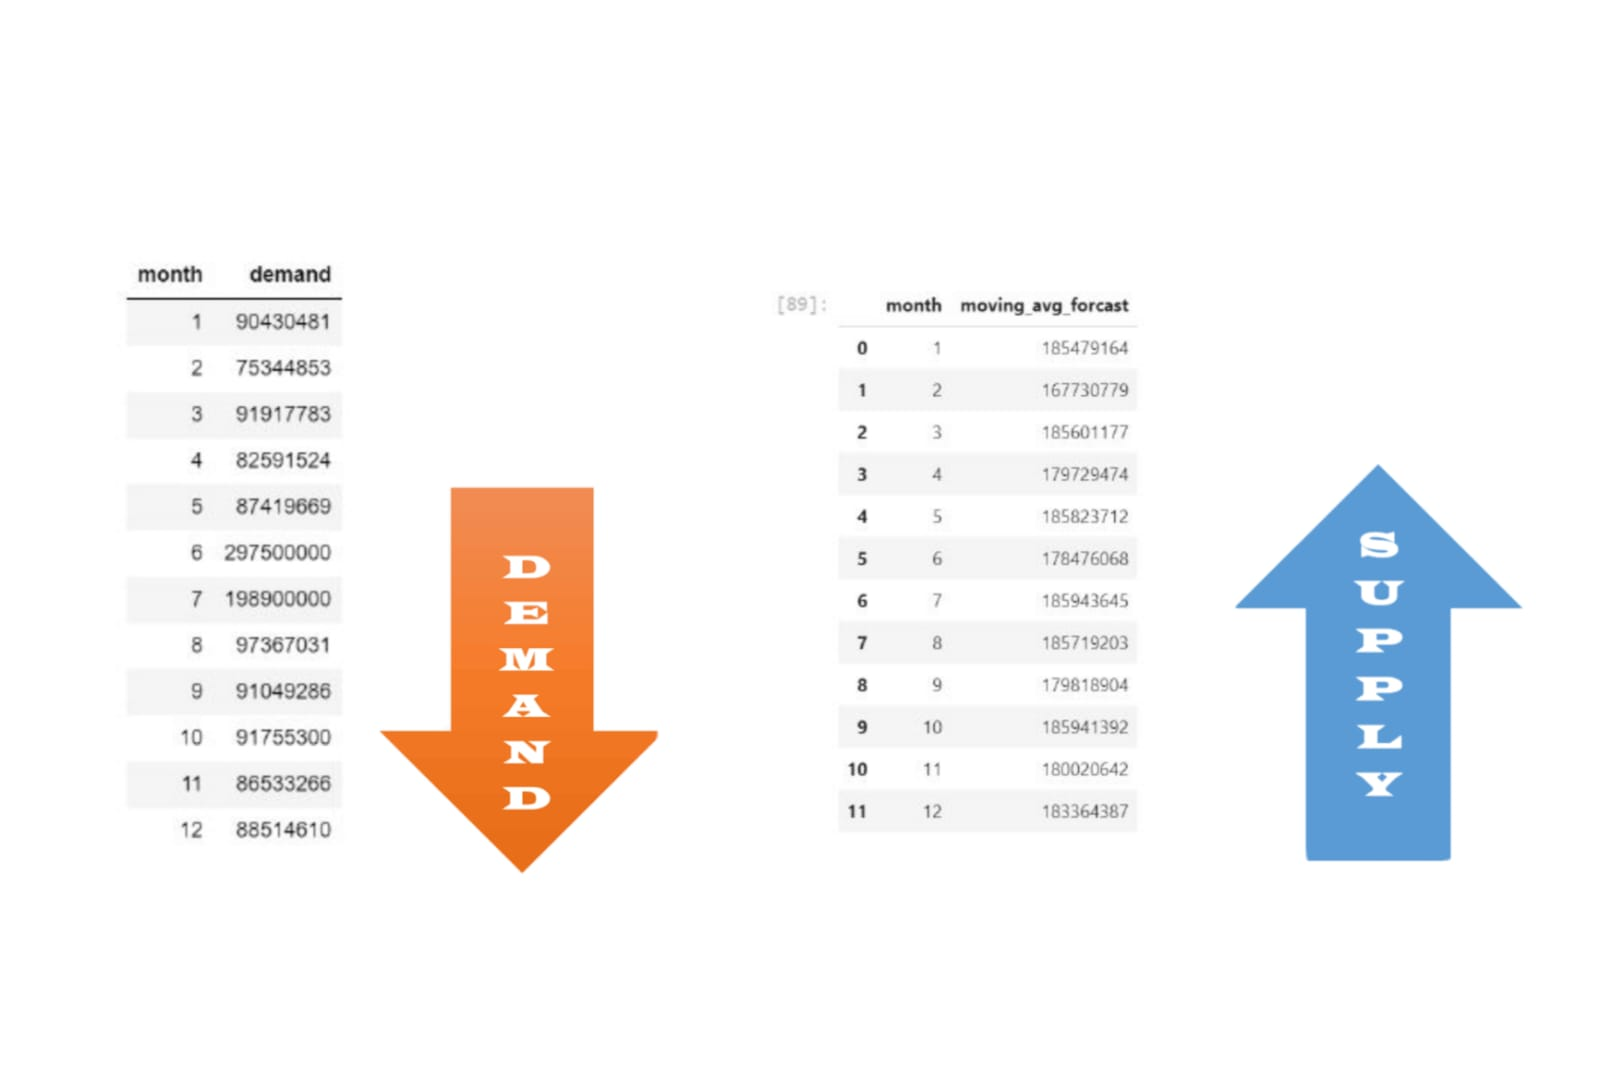

In [27]:
Image(filename='/kaggle/input/demand-vs-supply/demand vs supply .jpg')

*After our predictions the demand is low and the production is high here but we can store the ingredient for 8 months so that there can be no shortage if we are using moving_average model here*